In [17]:
import os
import fastai
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image
import gc
# CUDA_VISIBLE_DEVICES=1
# torch.cuda.set_device('cuda:1')

In [18]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3Oversampling/Completo')
dls = ImageDataLoaders.from_folder(path, train='train', valid='valid', bs=9, seed=43)

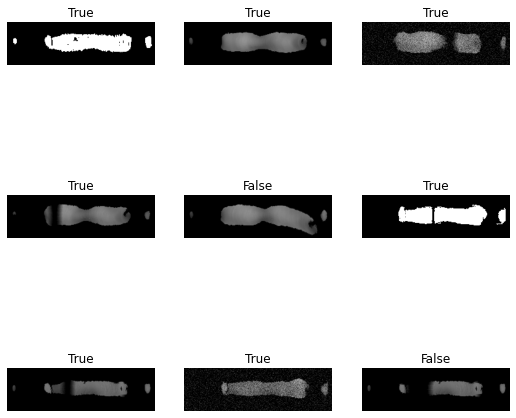

In [19]:
dls.show_batch()

In [28]:
precision = Precision()
f1 = F1Score()

In [30]:
learn = Learner(dls, alexnet(pretrained = True), opt_func = Adam,
              metrics=[accuracy,precision,f1])

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=6.30957365501672e-05)

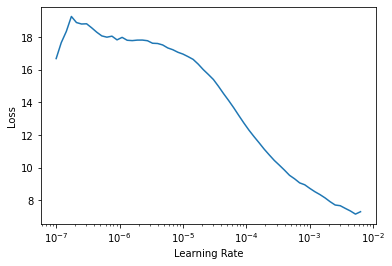

In [31]:
learn.lr_find()

In [32]:
learn.fit(4, lr=1e-4)

epoch,train_loss,valid_loss,accuracy,precision_score,f1_score,time
0,0.140589,0.224055,0.830000,0.965726,0.801003,01:02
1,0.143367,0.298342,0.866429,0.955595,0.851940,01:02
2,0.117903,0.514092,0.805714,1.000000,0.758865,01:02
3,0.103965,0.154422,0.943571,0.912351,0.945630,01:02


En este caso probamos con un learning rate que parece mas adecuado porque la celda anterior contenía un learning rate que parecia adecuado para otra gráfica del learning rate que se habia obtenido.

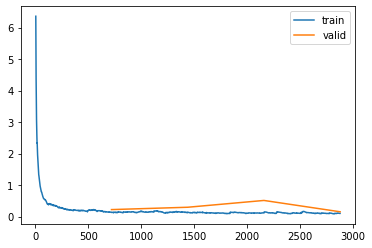

In [33]:
learn.recorder.plot_loss()

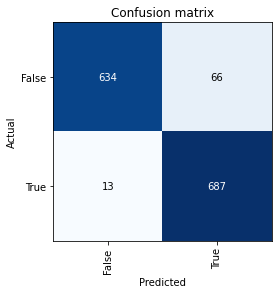

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()